# MachineLearningModel.ipynb
In this notebook we will create a machine learning model using for Texture Recognition using Haralick Texture Features  


Authors: Alexander Goudemond (219030365) and Sumeith Ishwanthlal (219006284)

In [1]:
import cv2
import numpy as np
from os import getcwd, walk
from mahotas import features
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import pickle

## Data Preprocessing

In [2]:
def extract_haralick_features(image):
        textures = features.haralick(image)
        hf_mean = textures.mean(axis=0)
        return hf_mean

In [3]:
def extract_average_pixel_value(image):
    return np.array([np.average(image[:, :, 0]), #average red 
                    np.average(image[:, :, 1]), #average green
                    np.average(image[:, :, 2]), #average blue
                    np.average(image)]) #average pixel value

In [4]:
train_features_haralick = []
train_average_pixel = []
train_images = []
train_labels = []
cnn_train_labels = []
haralick_features_R10 = []
haralick_features_R20 = []
haralick_features_R50 = []
haralick_features_R100 = []
haralick_features_R200 = []

average_pixel__R10 = []
average_pixel__R20 = []
average_pixel__R50 = []
average_pixel__R100 = []
average_pixel__R200 = []


currentDir = getcwd()
photoPath = currentDir + "\\Resized_Notes_DataSet"
path = walk(photoPath)
numProcessedImages = 0
print("Started to extract features from images")
for root, directories, files in path:
    for file in files:

        greyimage = cv2.imread("Resized_Notes_DataSet" + "\\" + file, cv2.IMREAD_GRAYSCALE)
        colImage = cv2.imread("Resized_Notes_DataSet" + "\\" + file, cv2.IMREAD_COLOR)

        haralick_features = extract_haralick_features(greyimage)
        train_features_haralick.append(haralick_features)
        train_images.append(colImage)

        average_pixel = extract_average_pixel_value(colImage)
        train_average_pixel.append(average_pixel)

        if "010" in file.split("_"):
            train_labels.append("R10") 
            cnn_train_labels.append(0)
            haralick_features_R10.append(haralick_features)
            average_pixel__R10.append(average_pixel)
            
        if "020" in file.split("_"):
            train_labels.append("R20")
            cnn_train_labels.append(1)
            haralick_features_R20.append(haralick_features)
            average_pixel__R20.append(average_pixel)

        if "050" in file.split("_"):
            train_labels.append("R50")
            cnn_train_labels.append(2)
            haralick_features_R50.append(haralick_features)
            average_pixel__R50.append(average_pixel)
        
        if "100" in file.split("_"):
            train_labels.append("R100")
            cnn_train_labels.append(3)
            haralick_features_R100.append(haralick_features)
            average_pixel__R100.append(average_pixel)
        
        if "200" in file.split("_"):
            train_labels.append("R200")
            cnn_train_labels.append(4)
            haralick_features_R200.append(haralick_features)
            average_pixel__R200.append(average_pixel)
        
        numProcessedImages += 1
        if numProcessedImages % 5 == 0:
            print(f"Processed {numProcessedImages} images...")

Started to extract features from images
Processed 5 images...
Processed 10 images...
Processed 15 images...
Processed 20 images...
Processed 25 images...
Processed 30 images...
Processed 35 images...
Processed 40 images...
Processed 45 images...
Processed 50 images...
Processed 55 images...


In [5]:
print(f"The first 5 Training features: \n{train_features_haralick[:5]}")

The first 5 Training features: 
[array([ 2.21735310e-03,  2.44882308e+01,  9.89739846e-01,  1.19330041e+03,
        4.62530546e-01,  3.26819293e+02,  4.74871340e+03,  7.87819762e+00,
        1.04907269e+01,  7.74987469e-04,  3.05994005e+00, -4.82180924e-01,
        9.99256553e-01]), array([ 1.20108062e-03,  1.13388904e+02,  9.62949707e-01,  1.53006977e+03,
        3.14995920e-01,  3.26316145e+02,  6.00689018e+03,  8.07467024e+00,
        1.17076166e+01,  3.97791456e-04,  4.01307517e+00, -3.51088010e-01,
        9.96104340e-01]), array([ 7.64297360e-04,  7.87853363e+01,  9.77069865e-01,  1.71774336e+03,
        3.24528752e-01,  3.59658595e+02,  6.79218809e+03,  8.22449889e+00,
        1.16125961e+01,  4.67528431e-04,  3.73512105e+00, -3.95202558e-01,
        9.98115093e-01]), array([ 6.19590581e-04,  2.97784925e+02,  9.11337101e-01,  1.67917418e+03,
        1.85281168e-01,  3.25753995e+02,  6.41891179e+03,  8.08981896e+00,
        1.25459982e+01,  2.15247560e-04,  4.79594544e+00, -2.411

In [6]:
print(f"The first 5 Training average pixels: \n{train_average_pixel[:5]}")

The first 5 Training average pixels: 
[array([149.44164276, 179.03445625, 138.08300591, 155.51970164]), array([149.1907959 , 178.79446983, 137.83278275, 155.27268283]), array([157.14299011, 193.58179092, 161.51134682, 170.74537595]), array([148.86021233, 178.54326439, 137.53833199, 154.9806029 ]), array([182.90674973, 206.52408028, 191.63935089, 193.6900603 ])]


In [7]:
print(f"The first training image: \n{train_images[1]}")

The first training image: 
[[[171 203 138]
  [170 202 137]
  [164 198 128]
  ...
  [168 201 127]
  [171 204 130]
  [172 205 131]]

 [[171 203 138]
  [169 201 136]
  [163 197 127]
  ...
  [167 200 126]
  [170 203 129]
  [171 204 130]]

 [[168 200 135]
  [167 199 134]
  [161 195 125]
  ...
  [166 199 125]
  [169 202 128]
  [170 203 129]]

 ...

 [[168 203 123]
  [167 202 122]
  [158 193 113]
  ...
  [164 197 122]
  [168 201 126]
  [169 202 127]]

 [[170 204 127]
  [170 204 127]
  [161 196 116]
  ...
  [166 199 124]
  [170 203 128]
  [171 204 129]]

 [[171 205 128]
  [171 205 128]
  [162 196 119]
  ...
  [167 200 125]
  [171 204 129]
  [172 205 130]]]


In [8]:
print(f"The first 5 Training labels: {train_labels[:5]}")

The first 5 Training labels: ['R10', 'R10', 'R10', 'R10', 'R10']


In [9]:
cnn_train_labels = to_categorical(cnn_train_labels)

In [10]:
cnn_train_labels[:5]

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

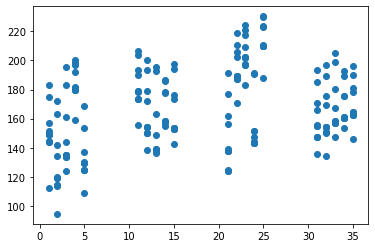

In [11]:
plt.scatter(x= [ [1, 11, 21, 31] * 11,[2, 12, 22, 32] * 11 ,[3, 13, 23, 33] * 11, [4, 14, 24, 34] * 11, [5, 15, 25, 35] * 11],
y = [average_pixel__R10,average_pixel__R20,average_pixel__R50,average_pixel__R100,average_pixel__R200])

# Creating the Machine Learning Classifier

In [11]:
modelHaralick = LinearSVC(random_state = 9, max_iter = 100000000)
c.fit(train_features_haralick, train_labels)
filename = 'modelHaralick.sav'
pickle.dump(modelHaralick, open(filename, 'wb'))

c:\Users\sumei\anaconda3\envs\COMP702Proj\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(max_iter=100000000, random_state=9)

In [12]:
modelAveragePixel = LinearSVC(random_state = 9, max_iter = 100000000)
modelAveragePixel.fit(train_average_pixel, train_labels)
filename = 'modelAveragePixel.sav'
pickle.dump(modelAveragePixel, open(filename, 'wb'))

LinearSVC(max_iter=100000000, random_state=9)

In [12]:
train_images[0].shape

(512, 1024, 3)

In [13]:
cnn = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(512, 1024, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=132, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(5, activation='softmax')
])
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 510, 1022, 64)     1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 255, 511, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 253, 509, 132)     76164     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 126, 254, 132)     0         
_________________________________________________________________
flatten (Flatten)            (None, 4224528)           0         
_________________________________________________________________
dense (Dense)                (None, 64)                270369856 
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 3

In [18]:
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(train_images, cnn_train_labels, epochs=10)

ValueError: Data cardinality is ambiguous:
  x sizes: 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512, 512
  y sizes: 55
Make sure all arrays contain the same number of samples.

In [17]:
len(train_images[0])

512

# Test the Support Vector Classifier

In [80]:
listA = []
for root, directories, files in path:
    for file in files:
        image = cv2.imread("Notes_DataSet\\" + file, cv2.IMREAD_GRAYSCALE)
        haralick_features = extract_features(image)
        prediction = SVCmodel.predict(features.reshape(1, -1))[0]
        print(haralick_features)
        listA.append(prediction)

print(listA)

[]


In [57]:
listA

[]